# Life expectancy
## Machine Learning Regression Model

### **Project overview**

* In this project, we will learn how to build an train a regression model using Scikit-Learn library.
* We will also learn how to train XG-Boost algorithm.

#### <span style="text-decoration: underline"><em>**What is Scikit-Learn?**</span></em>
Scikit-learn is a machine learning library in Python that provides a wide array of tools for various machine learning tasks. It's designed to be user-friendly, efficient, and highly accessible, making it an excellent choice for both beginners and experienced machine learning practitioners.

https://scikit-learn.org/stable/

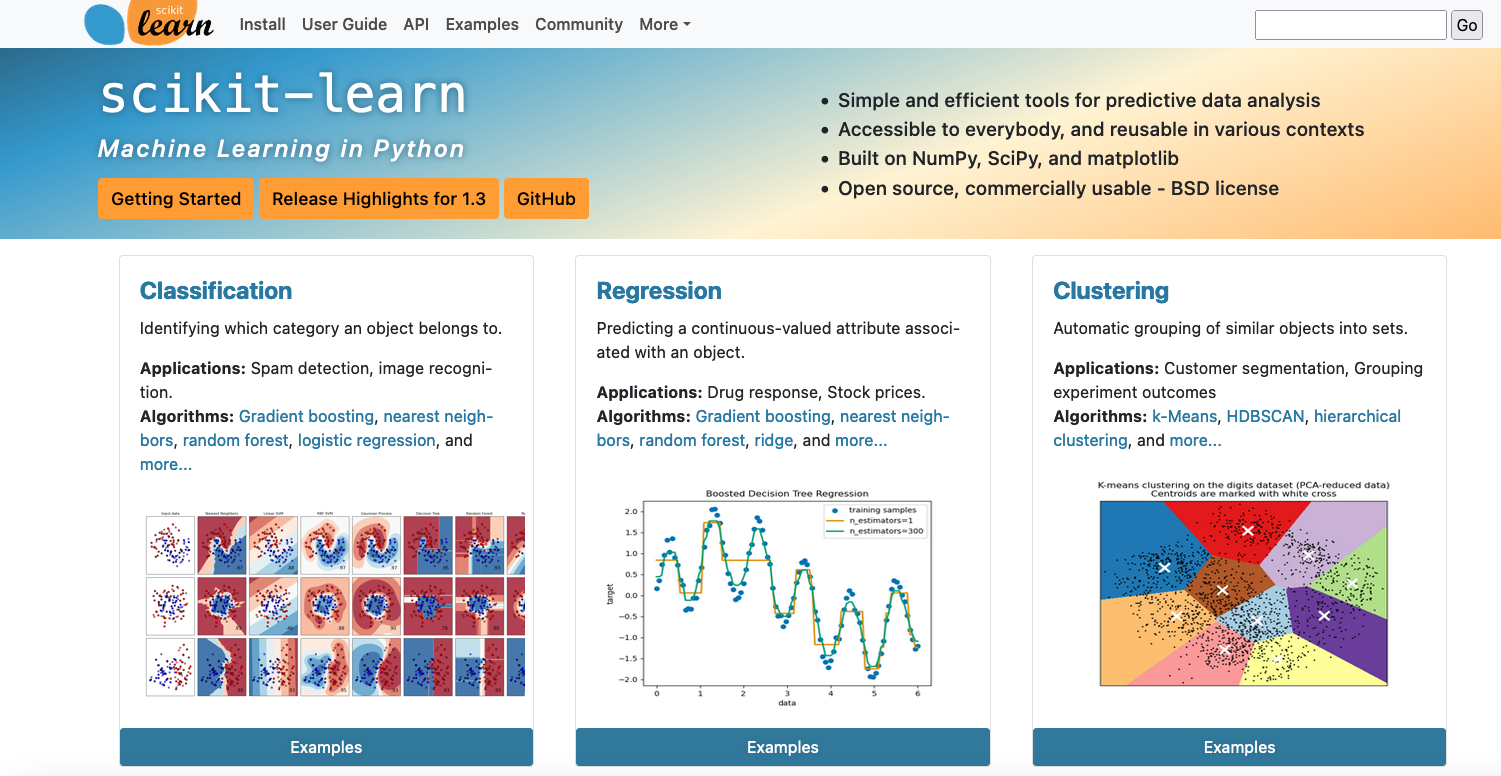

##### **Applications:**


* Classification: Categorizing data points into classes, such as spam detection, image recognition, and sentiment analysis.
* Regression: Predicting continuous values, such as predicting house prices based on various features.
* Clustering: Grouping similar data points together, like customer segmentation for marketing.
* Dimensionality Reduction: Reducing the number of features while retaining important information, aiding visualization and model efficiency.
* Natural Language Processing (NLP): Analyzing and processing text data, sentiment analysis, and text classification.
* Anomaly Detection: Identifying unusual patterns or data points, like fraud detection in financial transactions.
* Recommendation Systems: Suggesting products, movies, or content to users based on their preferences.
* Image Processing: Object detection, image classification, and image generation tasks.

##### **Important Components and Modules:**

* _sklearn.datasets_: Provides datasets for practicing and experimenting with different algorithms.
* _sklearn.preprocessing_: Contains tools for data preprocessing, such as scaling, encoding categorical variables, and handling missing values.
* _sklearn.model_selection_: Includes functions for model selection, cross-validation, and hyperparameter tuning.
* _sklearn.feature_selection_: Offers methods for selecting relevant features and reducing dimensionality.
* _sklearn.linear_model_: Contains various linear models, including regression and logistic regression.
* _sklearn.tree and sklearn.ensemble_: Provide decision tree-based models and ensemble methods like Random Forest and Gradient Boosting.
* _sklearn.cluster_: Includes clustering algorithms for unsupervised learning tasks.
* _sklearn.metrics_: Contains metrics for evaluating model performance.
* _sklearn.naive_bayes_: Implements Naive Bayes classifiers.
* _sklearn.svm_: Provides support for Support Vector Machines.
* _sklearn.neural_network_: Includes tools for working with neural networks.

### 1. Import all the libraries for data visualization and data treatment

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Open the csv file downloaded from kaggel

In [6]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### 2. Data visualization

#### Histograms

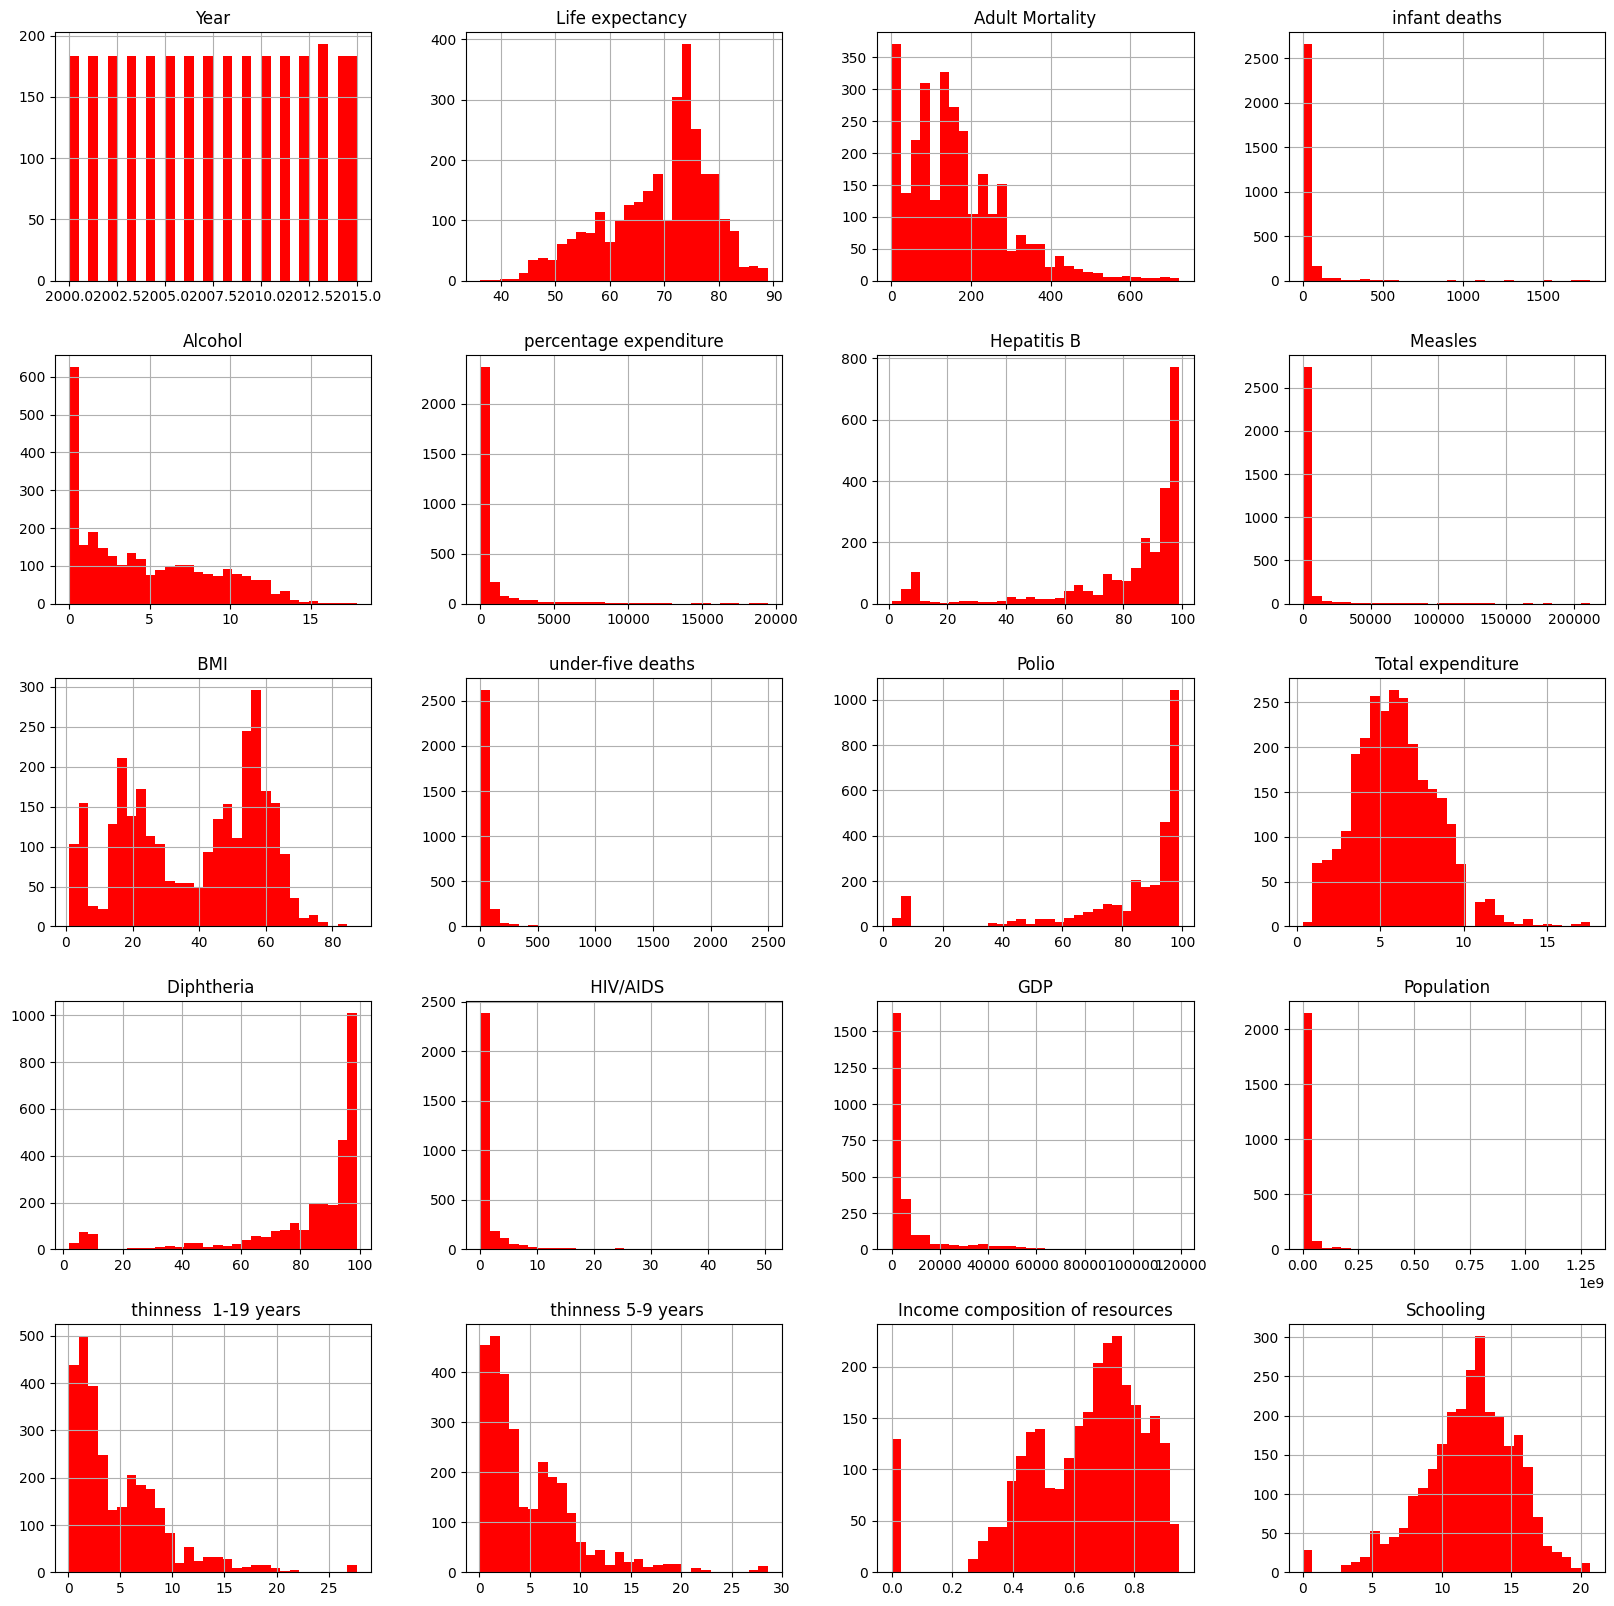

In [7]:
df.hist(bins = 30, figsize = (20, 20), color = 'r');

#### Heatmap - correlation matrix

In [8]:
#Define the numeric features
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
#Define the categorical features
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['Status'], dtype='object')

In [10]:
#Create the correlation
correlation = numeric_features.corr()
sorted_correlation = correlation['Life expectancy '].sort_values(ascending=False)
print(sorted_correlation, '\n')

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64 



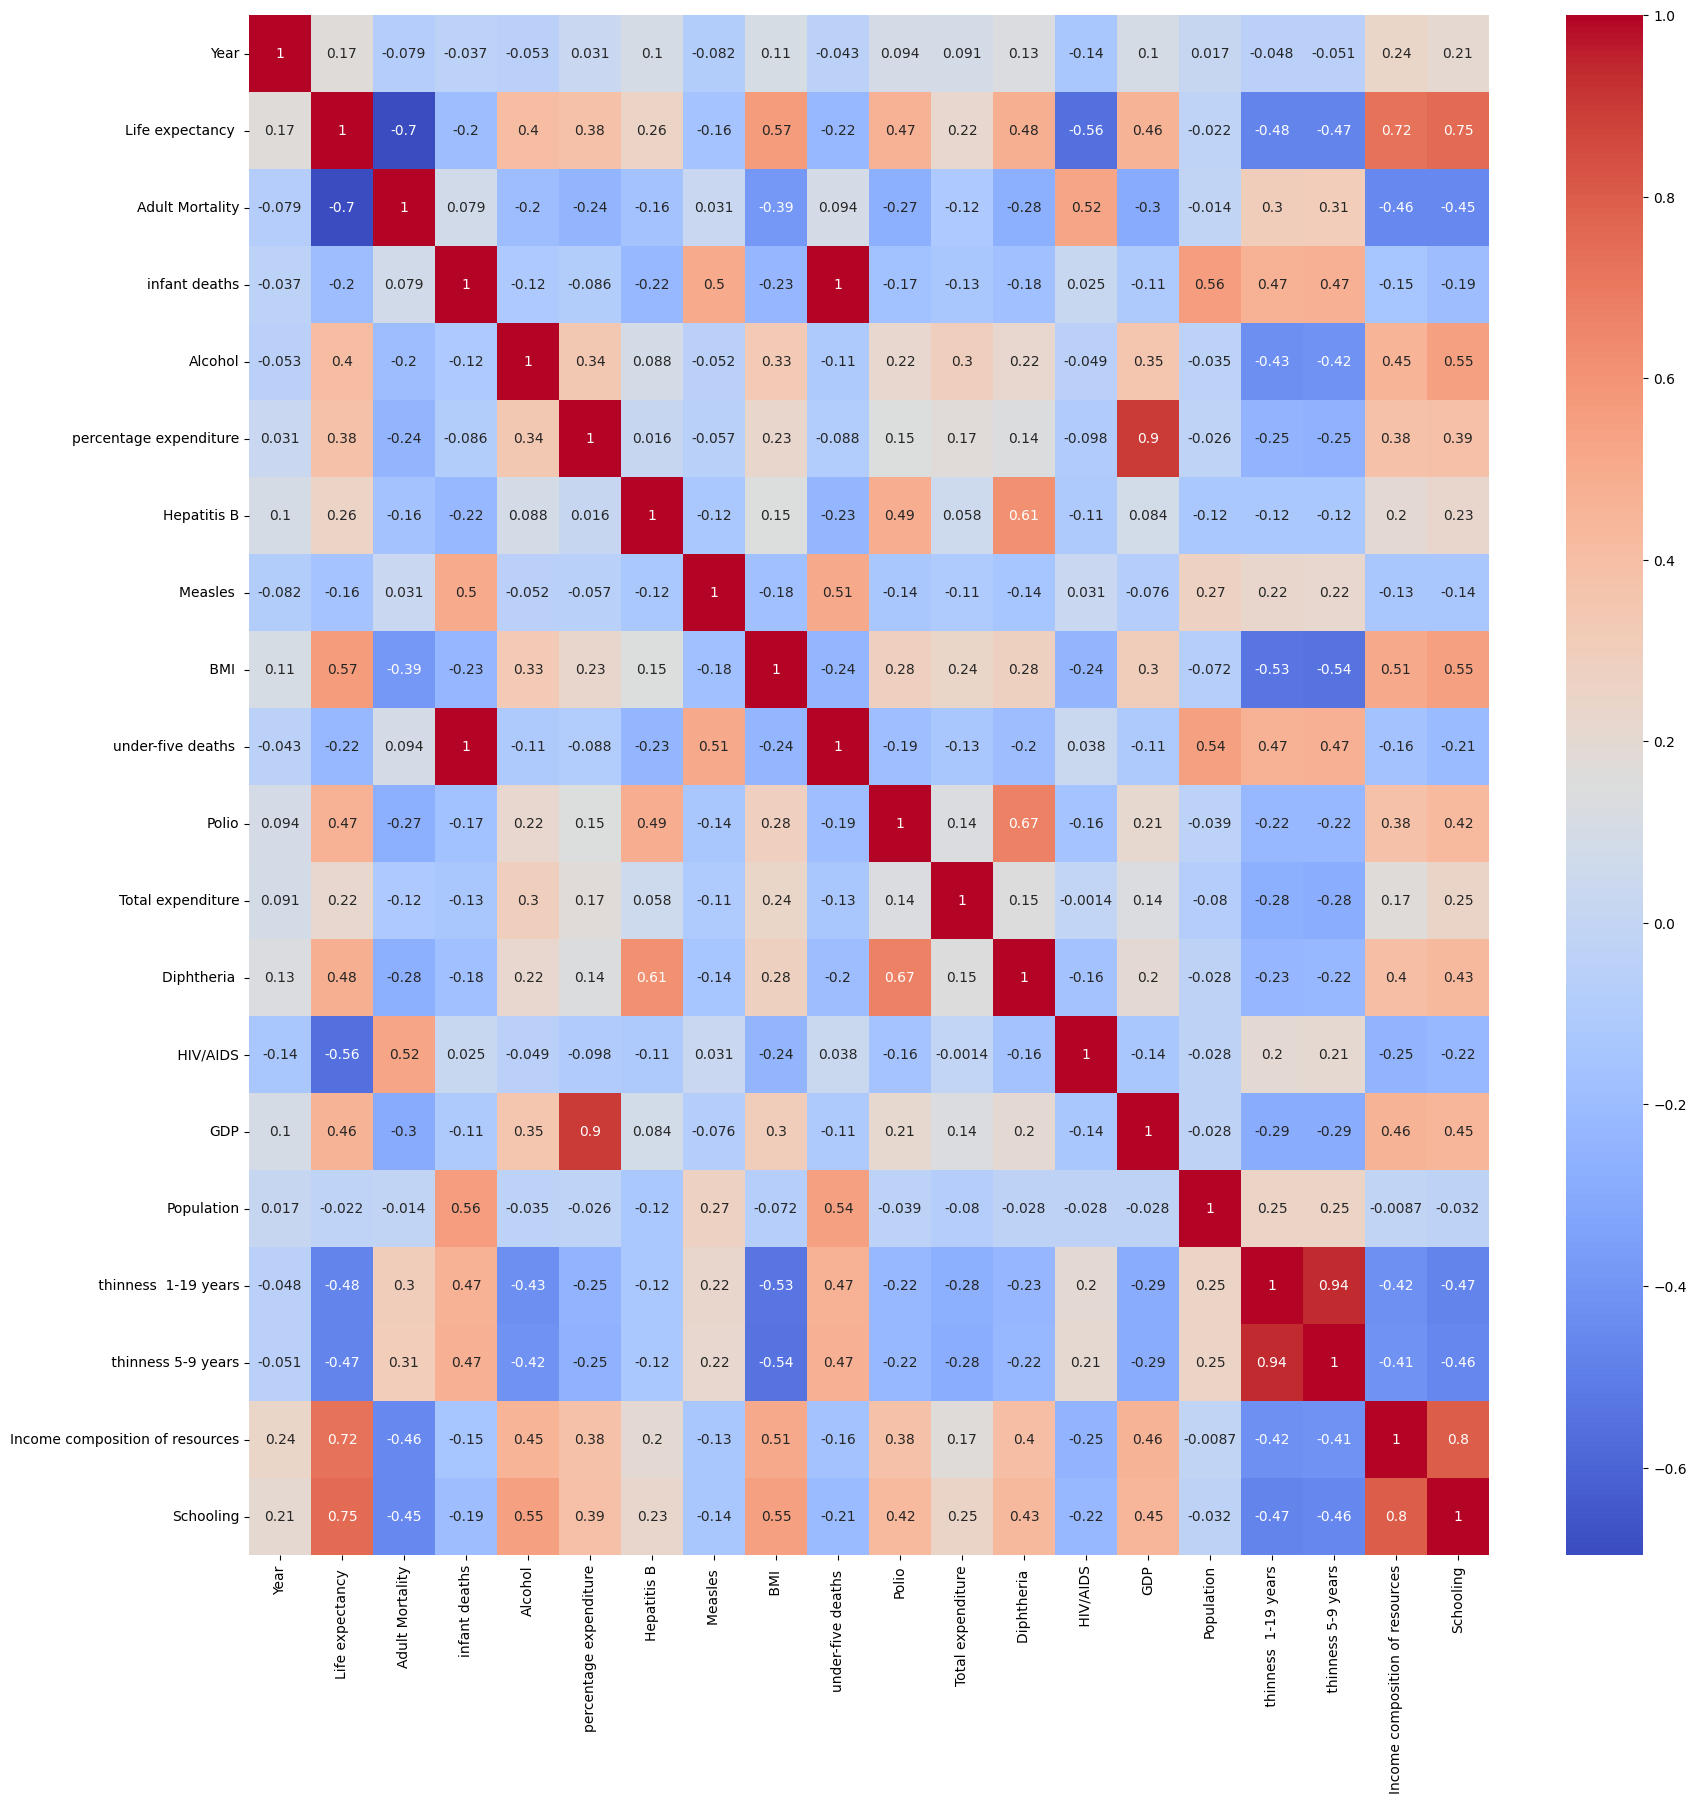

In [14]:
#Create a heatmap
plt.figure(figsize = (20,20))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

**Draw the most important correlations wrt 'Life expectancy'**

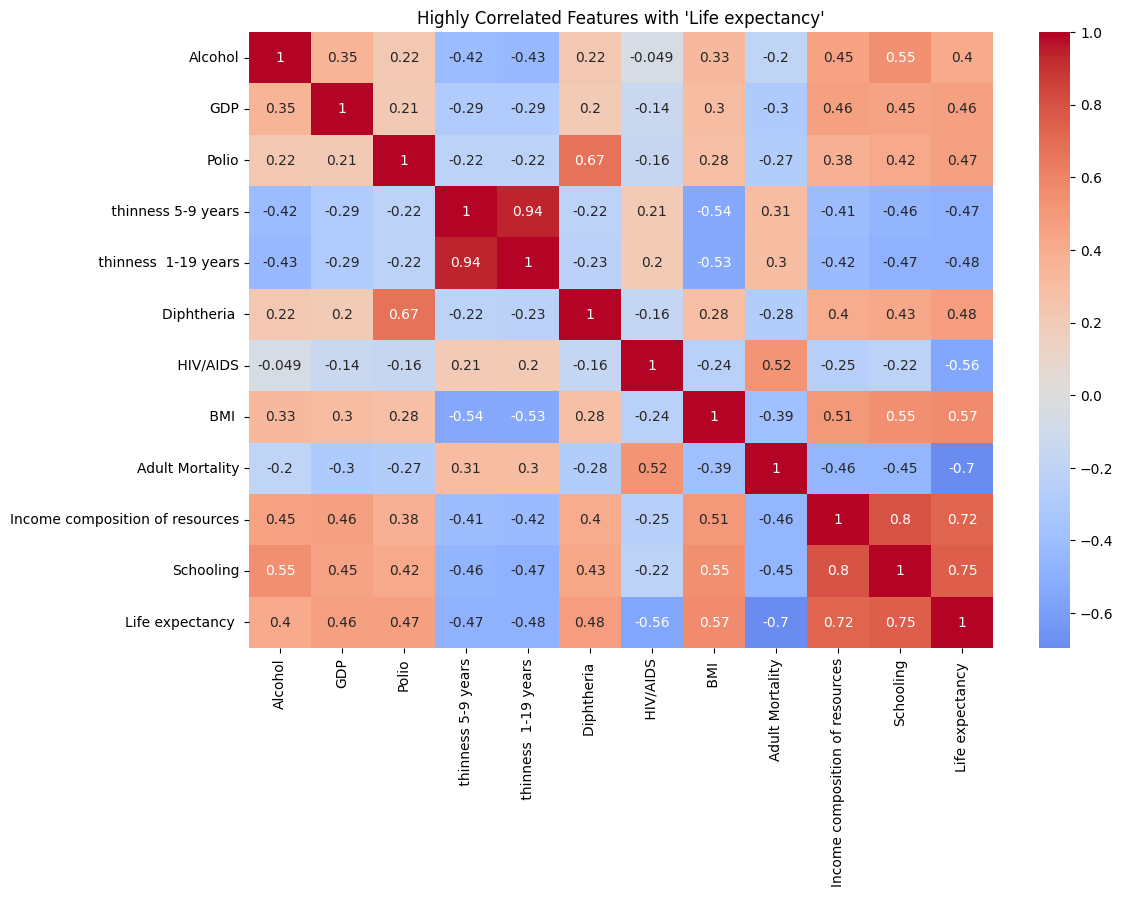

In [187]:
# Define the correlation threshold
correlation_threshold = 0.4

# Filter features with correlation above the threshold with 'Life expectancy'
highly_correlated_features = correlation[abs(correlation['Life expectancy ']) > correlation_threshold]

# Sort features by their correlation values in ascending order
sorted_features = highly_correlated_features['Life expectancy '].abs().sort_values(ascending=True).index

# Create a heatmap for the highly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(highly_correlated_features.loc[sorted_features, sorted_features], annot=True, cmap='coolwarm', center=0)
plt.title("Highly Correlated Features with 'Life expectancy'")
plt.show()

#### <u>Multicollinearity</u>

In multicollinearity, two or more of the predictors correlate strongly with each other

* The effect of independet variables cannot be clearly separated

**Why is this a problem?**

Given a regression model: $ \hat{y} = {\gamma}_{1}{x}_{1} + {\gamma}_{2}{x}_{2} + ... + {\gamma}_{n}{x}_{n} + {b} $, if ${x}_{1}$ and ${x}_{2}$ are strongly correlated then the regression model will have problems to determine ${w}_{1}$ and ${w}_{2}$

Lineal regression aims to know how the independent variables impact the target variable **individually**. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. In other words, since thinness 5-9 years and thinness 1-19 years tend to increase or decrease together, it can be difficult to determine how each one separately is associated with the response, Life expectancy.

If the regression model only interests a prediction, then multicollinearity is not a problem. However, if the regression is built to measure the influence of the independent on the dependent variable, the coefficients cannot be interpreted meaningfully.

**How to correct multicollinearity?**

When faced with the problem of collinearity, there are two simple solutions. The first is to drop one of the problematic variables from the regression. This can usually be done without much compromise to the regression fit, since the presence of collinearity implies that the information this variable provides about the response is redundant in the presence of the other variables. The second solution is to combine the collinear variables together into a single predictor. For instance, we might take the average of standardized versions of thinness 5-9 years and thinness 1-19 years in order to create a new variable that measures both.

*Source: "An introduction to Statistical Learning"*

**How to eliminate multicollinearity in practice?**

* If we want our model only to make predictions, then multicollinearity is not a problem, and we can use the model as it is.
* Calculate the VIF and remove the highly correlated variables (ones with the highest VIF).
* Add data that might break the pattern of multicollinearity.
* Ridge regression.

In our case, we want to use the correlation only for predictions. So, the regression will be use as it is.

### 3. Preparing the data

#### Missing data

<Axes: >

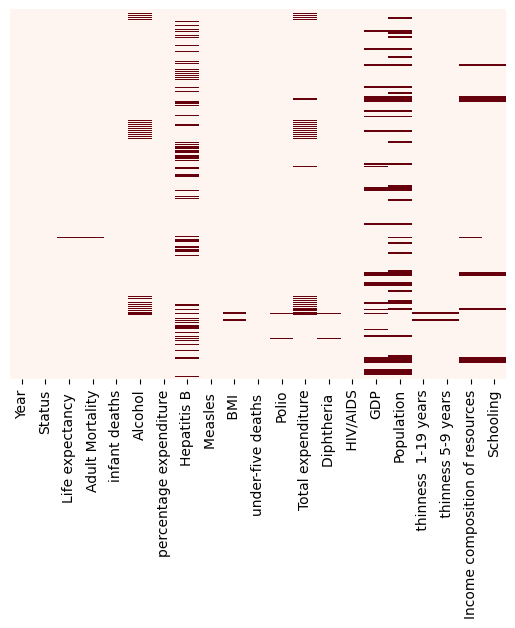

In [188]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "Reds")

The blue lines in the figure represent missing values in a given location within the data file.

In [190]:
#Perform one-hot encoding
print(df)

      Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0     2015  Developing              65.0            263.0             62   
1     2014  Developing              59.9            271.0             64   
2     2013  Developing              59.9            268.0             66   
3     2012  Developing              59.5            272.0             69   
4     2011  Developing              59.2            275.0             71   
...    ...         ...               ...              ...            ...   
2933  2004  Developing              44.3            723.0             27   
2934  2003  Developing              44.5            715.0             26   
2935  2002  Developing              44.8             73.0             25   
2936  2001  Developing              45.3            686.0             25   
2937  2000  Developing              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   \
0        0.01   

In [191]:
df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

#### <u>Handling missing data</u>

* Delete the missing value: applicable only when the data set is big enough to contrast it.
* Create a separate model to handle the missing values
* Statistical methods, *i.e.*, mean, median and mode.

**Statistical methods**

* Mean: replace the missing values with the average of the feature.
* Median: replace the missing value with the median value of the sorted feature.
* Mode: replace the missing values with the highest frequency value of the feature.

Here, it is shown the total missing values per feature

#### *One-hot encoding*

Since one of the columns (Status = Developing or developed) contains categorical data, it is necessary to transform it into binary data before fitting and training a Machine Learning algorithm. For each categorical variable, One Hot Encoding produces a numeric vector with a length equal to the number of categories present in the feature.

In [192]:
print(df)

      Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0     2015  Developing              65.0            263.0             62   
1     2014  Developing              59.9            271.0             64   
2     2013  Developing              59.9            268.0             66   
3     2012  Developing              59.5            272.0             69   
4     2011  Developing              59.2            275.0             71   
...    ...         ...               ...              ...            ...   
2933  2004  Developing              44.3            723.0             27   
2934  2003  Developing              44.5            715.0             26   
2935  2002  Developing              44.8             73.0             25   
2936  2001  Developing              45.3            686.0             25   
2937  2000  Developing              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   \
0        0.01   

In [193]:
df = pd.get_dummies(df, columns = ['Status'])

In [196]:
print(df)

      Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015              65.0            263.0             62     0.01   
1     2014              59.9            271.0             64     0.01   
2     2013              59.9            268.0             66     0.01   
3     2012              59.5            272.0             69     0.01   
4     2011              59.2            275.0             71     0.01   
...    ...               ...              ...            ...      ...   
2933  2004              44.3            723.0             27     4.36   
2934  2003              44.5            715.0             26     4.06   
2935  2002              44.8             73.0             25     4.43   
2936  2001              45.3            686.0             25     1.72   
2937  2000              46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   

In [198]:
#Check the number of null values for the columns having null values
df.isnull().sum()[np.where(df.isnull().sum() != 0)[0]]

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [199]:
#Continous values, so we fill them with the mean
df = numeric_features.apply(lambda x: x.fillna(x.mean()), axis=0)

In [200]:
df.isnull().sum()[np.where(df.isnull().sum() != 0)[0]]

Series([], dtype: int64)

<Axes: >

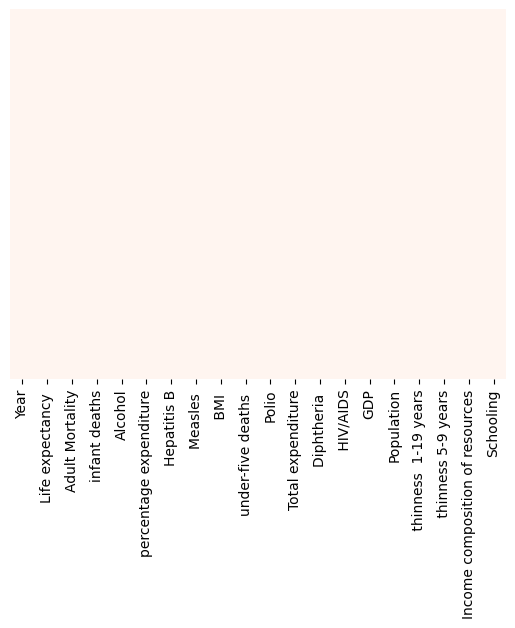

In [201]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "Reds")

### 4. Splitting the data

In [203]:
#Create train and test data
X = df.drop(columns = ['Life expectancy '])
y = df[['Life expectancy ']]

In [204]:
#Convert the data type to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [210]:
#Splitting the data into training, cross-validation, and test sets
from sklearn.model_selection import train_test_split

#Get 60% of the dataset as the training set. Put the remaining 40% in the temporary X_ and y_
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.4, random_state = 1)

#Split the 40% subset into two: 1/2 as cross-validation and 1/2 as test sets
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = 1)

#Delete temporary variables
del X_, y_

print(f"the shape of the training set (input) is : {X_train.shape}")
print(f"the shape of the training set (targe) is : {y_train.shape}")
print(f"the shape of the cross validation set (input) is : {X_cv.shape}")
print(f"the shape of the cross validation set (targe) is : {y_cv.shape}")
print(f"the shape of the test set (input) is : {X_test.shape}")
print(f"the shape of the training set (targe) is : {y_test.shape}")

the shape of the training set (input) is : (1762, 19)
the shape of the training set (targe) is : (1762, 1)
the shape of the cross validation set (input) is : (588, 19)
the shape of the cross validation set (targe) is : (588, 1)
the shape of the test set (input) is : (588, 19)
the shape of the training set (targe) is : (588, 1)


### 5. Normalization

Normalization aims to transform features to be on a similar scale. This improves the performance and training stability of the model.

#### **Important!** When scaling the cross-validation set, it is crucial to use the same mean and std deviation as the training set.

To do so, the _StandardScaler_ will be used in combination with **transform()** method instead of **fit_transform()**

In [228]:
#Import the library
from sklearn.preprocessing import StandardScaler

#Initialize the class
scaler_linear = StandardScaler()

#Compute the mean and std deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze()}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze()}")
print(f"Peak to Peak range by column in Raw X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_train_scaled,axis=0)}")

Computed mean of the training set: [2.00756583e+03 1.65691250e+02 2.86061294e+01 4.54635667e+00
 7.72474623e+02 8.15922013e+01 2.33120318e+03 3.86165657e+01
 3.96980704e+01 8.26876290e+01 5.94227282e+00 8.23892673e+01
 1.75471056e+00 7.75030984e+03 1.23800669e+07 4.75301543e+00
 4.73025953e+00 6.25342460e-01 1.19644441e+01]
Computed standard deviation of the training set: [4.60991770e+00 1.24572830e+02 1.16387940e+02 3.89143731e+00
 2.12088743e+03 2.13606309e+01 1.09116613e+04 1.97075894e+01
 1.56850481e+02 2.29110888e+01 2.41376731e+00 2.34021045e+01
 5.06742987e+00 1.36575424e+04 5.39783703e+07 4.21845148e+00
 4.27964813e+00 2.07225149e-01 3.28246362e+00]
Peak to Peak range by column in Raw X:[1.5000000e+01 7.2200000e+02 1.8000000e+03 1.7860001e+01 1.9479912e+04
 9.7000000e+01 1.8248500e+05 8.1800003e+01 2.4000000e+03 9.6000000e+01
 1.6840000e+01 9.7000000e+01 5.0500000e+01 1.1575789e+05 1.2938593e+09
 2.7400000e+01 2.8400000e+01 9.4800001e-01 2.0400000e+01]
Peak to Peak range by col

### 5. Train the model


In [230]:
#Import the library
from sklearn.linear_model import SGDRegressor

#Initialize the class
linear_model = LinearRegression()

#Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

### 6. Evaluate the model

In [233]:
#Import the library
from sklearn.metrics import mean_squared_error

In [247]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

Training MSE (using sklearn function): 7.8659892082214355


In [244]:
# Scale the cross validation set using the mean and standard deviat ion of the training set
X_cv_scaled = scaler_linear.transform(X_cv)

# print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze()}")
# print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze()}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 8.304893493652344


In [246]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_test_scaled = scaler_linear.transform(X_test)

# print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze()}")
# print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze()}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_test_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Test MSE: {mean_squared_error(y_test, yhat) / 2}")

Test MSE: 9.54319953918457


### With XGBoost

In [250]:
pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /Users/stefani/miniconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [252]:
import xgboost as xgb

model = xgb.XGBRegressor(objetive = 'reg:squarederror', lerning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(X_train, y_train)

[18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "objetive" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, lerning_rate=0.1,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objetive='reg:squarederror', ...)

In [258]:
y_predict = model.predict(X_cv)
y_predict

array([70.4396  , 72.70759 , 69.66462 , 74.74419 , 80.97044 , 75.35183 ,
       70.46136 , 78.92548 , 51.046574, 47.615654, 52.177917, 77.28874 ,
       70.17456 , 73.541504, 73.043304, 76.75826 , 69.11717 , 74.67802 ,
       70.12685 , 73.625725, 74.22944 , 59.92504 , 68.82431 , 72.50293 ,
       73.77746 , 54.427067, 71.43154 , 79.52553 , 73.599785, 71.45616 ,
       52.710052, 55.16064 , 77.51619 , 73.14112 , 64.00024 , 64.246185,
       59.40742 , 71.875015, 76.33408 , 59.67686 , 49.836906, 75.57887 ,
       72.28153 , 57.49721 , 52.048115, 52.853188, 52.507435, 75.07527 ,
       50.381573, 73.45367 , 71.56206 , 70.61681 , 49.349224, 74.272095,
       50.51148 , 54.106743, 64.474304, 75.59017 , 73.908195, 74.98369 ,
       72.8312  , 77.13843 , 68.12253 , 67.51572 , 83.55021 , 65.82778 ,
       73.68285 , 74.0895  , 56.019306, 66.592384, 81.16632 , 80.851166,
       68.6232  , 78.08846 , 74.46732 , 73.910645, 54.529938, 77.165306,
       71.71958 , 66.368546, 76.45269 , 73.4711  , 

In [259]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_cv.shape[1]
n = len(X_cv)
RMSE = float(format(np.sqrt(mean_squared_error(y_cv, y_predict))))
MSE = mean_squared_error(y_cv, y_predict)
r2 = r2_score(y_cv, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print(f"RMSE = {RMSE}, \nMSE = {MSE}, \nR2 = {r2}, \nAdjusted R2 = {adj_r2}")

RMSE = 1.9723467826843262, 
MSE = 3.8901519775390625, 
R2 = 0.9543374734514196, 
Adjusted R2 = 0.9528100297816607
